In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

[sudo] password for piyush: 
  Using cached pytesseract-0.3.10-py3-none-any.whl (14 kB)
  Using cached Pillow-9.3.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.3 MB)


In [55]:
import os
from PIL import Image
import pytesseract
from pytesseract import image_to_string
import pandas as pd
from pytesseract import Output
import cv2
# from google.colab.patches import cv2_imshow

In [3]:
# https://stackoverflow.com/questions/61418907/how-to-convert-or-extract-a-table-from-an-image-using-tesseract
# https://github.com/pankti-fadia-inferenz/financial-documents-ocr-deep-learning/tree/master/code

In [56]:
image = cv2.imread('./content/test.png')

In [61]:
img_resized = cv2.resize(image,
                         (int(image.shape[1] + (image.shape[1] * 0.4)),
                          int(image.shape[0] + (image.shape[0] * .4))),
                         interpolation=cv2.INTER_AREA) 
img_bin_otsu = cv2.threshold(image,128,255,cv2.THRESH_BINARY)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img

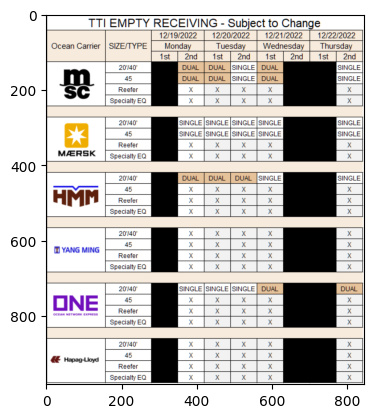

In [ ]:


# displaying the image
plt.imshow(img_resized)

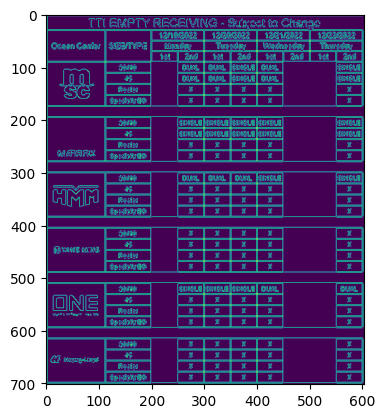

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# threshold the image using Otsu's thresholding method
thresh = cv2.threshold(gray, 100, 200,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# dist = cv2.distanceTransform(thresh, cv2.DIST_L2, )
# dist = cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
# dist = (dist * 255).astype("uint8")
# cv2.imshow("Dist", dist)
# cv2.imshow("Otsu", thresh)
plt.imshow(cv2.Canny(thresh, 50, 150))

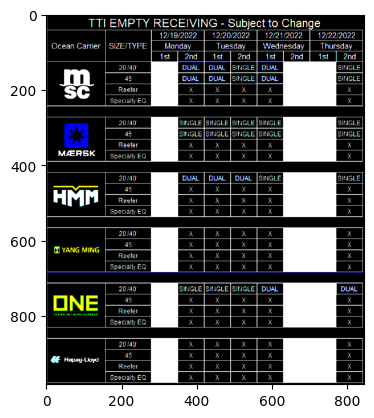

In [ ]:
thresh,img_bin = cv2.threshold(img_resized,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
# plt.title("Inverted Image with global thresh holding")
# plt.show()

In [ ]:
img_rgb = cv2.cvtColor(img_resized,c, cv2.IMREAD_COLORv2.COLOR_BGR2RGB)
a=pytesseract.image_to_string(img_resized) 

In [63]:
rows = []
custom_config = r'--oem 3 --psm 3 -l eng '
d = pytesseract.image_to_data(img_resized, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(data=d)
# file = open('data.txt','w')

# clean up blanks
df1 = df[(df.conf != '-1') & (df.text != ' ') & (df.text != '')]
# sort blocks vertically
sorted_blocks = df1.groupby('block_num').first(
).sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num'] == block]
    sel = curr[curr.text.str.len() > 3]
    char_w = (sel.width/sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
        # add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0

        added = 0  # num of spaces that should be added
        if ln['left']/char_w > prev_left + 1:
            added = int((ln['left'])/char_w) - prev_left
            text += ' ' * added
        text += ln['text'] + ' '
        prev_left += len(ln['text']) + added + 1
    text += '\n'
    # print(text)
    # file.write(text)

    for row in text.split("\n"):
        rows.append(row)
# file.close()

# Print the data that we have extracted

for i in rows:
    print(i)



TT 


         EMPTY  RECEIVING - Subject to Change 


                              12/19/2022     12/20/2022    12/21/2022    12/22/2022 
 Ocean  Carrier | SIZE/TYPE     Monday      Tuesday      Wednesday        Thursday 
                              1st_|  2nd     1st_| 2nd     1st 
                   20140"           DUAL |  DUAL  |SINGLE] DUAL                SINGLE 
   m                 45             DUAL |  DUAL  |SINGLE| DUAL                SINGLE 
     sc           Reefer              Xx     Xx     Xx      x 
                 Specialty EQ         Xx     Xx      x      x 
                   20140"           SINGLE | SINGLE |SINGLE |SINGLE 
                     45             SINGLE | SINGLE |SINGLE |SINGLE            ‘SINGLE 
                  Reefer              xX     x       x      x 
   MAERSK     [| SpeciaityEQ          x      X       X      X 
                   20140"           DUAL |  DUAL | DUAL 
 ~   Vana           45                Xx     X       x 
  HMM          

In [ ]:
# info = pytesseract.image_to_string(img_resized)

In [ ]:
# info

' \n\nTTI EMPTY RECEIVING - Subject to Change\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n12/12/2022 12/13/2022 12/14/2022 12/15/2022\nOcean Carrier | SIZE/TYPE Monday Tuesday Wednesday Thursday\n1st 2nd 1st 2nd 1st 2nd 1st 2nd\n20740" DUAL | DUAL | DUAL |SINGLE| DUAL | DUAL | xX {SINGLE\nm 45 DUAL | DUAL | DUAL |SINGLE| DUAL | DUAL | xX _ {SINGLE\nsc Reefer SINGLE | SINGLE | SINGLE | SINGLE | SINGLE | SINGLE | SINGLE | SINGLE\nSpecialtyEQ | X x X Xx X X x X\n20/40 | SINGLE] SINGLE | SINGLE | SINGLE | SINGLE | SINGLE | SINGLE | SINGLE\n45 SINGLE | SINGLE | SINGLE | SINGLE | SINGLE | SINGLE | SINGLE | SINGLE\nReefer | SINGLE| SINGLE] SINGLE | SINGLE | SINGLE | SINGLE | SINGLE | SINGLE\nMAERSK | SpeciatyEQ | x Xx x X X X Xx X\n20/40 | SINGLE] SINGLE | SINGLE | SINGLE | SINGLE | SINGLE | SINGLE | SINGLE\nnaenvapa 45 S

## try with other

In [65]:
img = cv2.imread('./content/test.png')

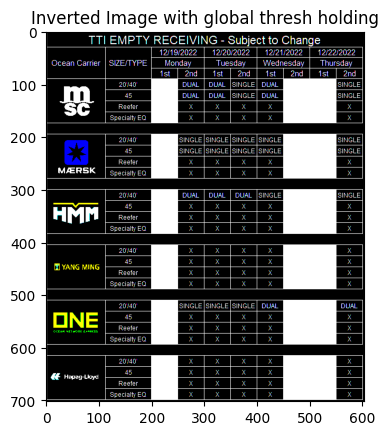

In [71]:
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.title("Inverted Image with global thresh holding")
plt.show()

In [64]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

In [74]:
import numpy as np
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//150))
eroded_image = cv2.erode(img_bin, vertical_kernel, iterations=5)

In [75]:
vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=5)

In [ ]:
image_2 = cv2.erode(img_bin, hor_kernel, iterations=5)
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//150, 1))
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=5)